In [1]:
#first for EDA, we will create PCA and UMAP plots of the 100k data, sorted by batch, want to see batch effects
#first load in the 100k assay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir('/home/sarthak/cornell/Krumsiek/')

In [2]:
#read in the 100k assay

assay = pd.read_csv('UKBB_100K_metabolomics_assay.csv', index_col=0)
data_df = assay.T
data_df.head()

,Total Cholesterol,Total Cholesterol Minus HDL-C,"Remnant Cholesterol (Non-HDL, Non-LDL -Cholesterol)",VLDL Cholesterol,Clinical LDL Cholesterol,LDL Cholesterol,HDL Cholesterol,Total Triglycerides,Triglycerides in VLDL,Triglycerides in LDL,...,Cholesteryl Esters in Medium HDL,Free Cholesterol in Medium HDL,Triglycerides in Medium HDL,Concentration of Small HDL Particles,Total Lipids in Small HDL,Phospholipids in Small HDL,Cholesterol in Small HDL,Cholesteryl Esters in Small HDL,Free Cholesterol in Small HDL,Triglycerides in Small HDL
1000068,3.5838,2.4038,1.1072,0.50191,1.8569,1.2966,1.18000,0.91388,0.63757,0.10199,...,0.37278,0.070588,0.038566,0.008904,1.04530,0.59225,0.41154,0.31277,0.098765,0.041553
1000214,3.4915,2.6248,1.2344,0.63748,2.0149,1.3904,0.86668,1.11880,0.83289,0.11079,...,0.26373,0.046554,0.034611,0.008078,0.92904,0.51727,0.36776,0.27958,0.088180,0.044007
1000839,5.2337,3.9922,1.9074,0.95180,3.1490,2.0848,1.24140,2.05930,1.63810,0.15870,...,0.41646,0.089042,0.063932,0.011554,1.36750,0.77227,0.52749,0.39717,0.130320,0.067736
1001128,5.2210,3.5764,1.6999,0.62985,2.9822,1.8765,1.64460,0.67053,0.40317,0.09648,...,0.52457,0.110010,0.041870,0.010739,1.26510,0.72827,0.50288,0.38213,0.120750,0.033969
1001172,4.2067,2.8034,1.3153,0.50709,2.2521,1.4881,1.40320,0.85724,0.58165,0.10283,...,0.45631,0.092859,0.040056,0.009966,1.18240,0.67845,0.46519,0.35288,0.112300,0.038769


In [3]:
#turn to np array
data = np.array(data_df)
print(data.shape)
print(data[:5,:5])

#size is expected, 98698 samples, 168 metabolites

(98698, 168)
[[3.5838  2.4038  1.1072  0.50191 1.8569 ]
 [3.4915  2.6248  1.2344  0.63748 2.0149 ]
 [5.2337  3.9922  1.9074  0.9518  3.149  ]
 [5.221   3.5764  1.6999  0.62985 2.9822 ]
 [4.2067  2.8034  1.3153  0.50709 2.2521 ]]


In [4]:
#now we load in the metadata
columns2read = ['eid', 'Spectrometer']
assay = pd.read_csv('UKBB_100K_metabolomics_metadata.csv', usecols=columns2read)
assay['Spectrometer'] = assay['Spectrometer'].str.split().str[-1]


assay.head()

,eid,Spectrometer
0,1000068,5
1,1000214,1
2,1000839,2
3,1001128,4
4,1001172,3


In [5]:
#check to ensure the eid are in order
idx1 = assay['eid'].values
idx2 = data_df.index.values
print(idx1[:5])
print(idx2[:5])

for i in range(len(idx1)):
    if str(idx1[i]) != idx2[i]:
        print('error')
        break

[1000068 1000214 1000839 1001128 1001172]
['1000068' '1000214' '1000839' '1001128' '1001172']


In [6]:
#deal with the NaN values
#first find how many rows have an NaN value
nan_rows = np.where(np.isnan(data).any(axis=1))[0]
print(len(nan_rows))

5984


In [7]:
#let's remove the nan_rows from data and from spectrometer
spec_num = assay['Spectrometer'].values
spec_num_filtered = np.delete(spec_num, nan_rows)
print(len(spec_num_filtered))

data_filtered = np.delete(data, nan_rows, axis=0)
print(data_filtered.shape)

92714
(92714, 168)


In [8]:
#finally let's z score normalize the data for each column
from scipy.stats import zscore
data_final = zscore(data_filtered, axis=0)
print(data_final.shape)

(92714, 168)


In [10]:
print(data_final[:,0].mean())
#now std
print(data_final[:,0].std())

5.713985513816851e-14
0.9999999999999912


<Axes: >

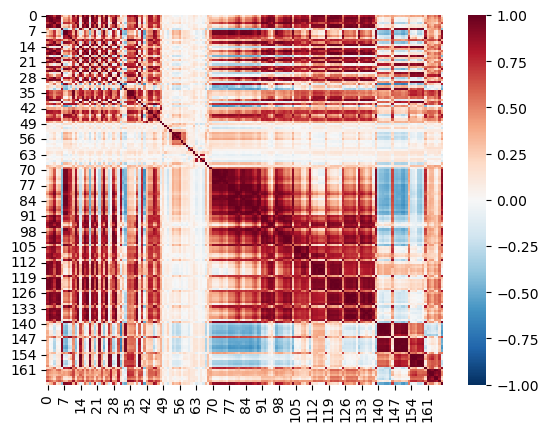

In [11]:
#do corr on the data

corr = np.corrcoef(data_final, rowvar=False)

#now do a heatmap
import seaborn as sns
sns.heatmap(corr, cmap='RdBu_r', center=0, vmin=-1, vmax=1)

In [9]:
print(data_final[:5,:5])

[[-1.0616066  -1.04045817 -1.08148239 -0.894332   -0.90917559]
 [-1.16056839 -0.77545087 -0.7751334  -0.34329989 -0.69137058]
 [ 0.7073756   0.86423683  0.84572246  0.93427193  0.87200066]
 [ 0.69375897  0.36563939  0.34597864 -0.37431247  0.64206475]
 [-0.39374854 -0.5612866  -0.58029352 -0.87327759 -0.36438737]]


In [10]:
from sklearn.decomposition import PCA

# Create PCA instance: You can change the number of components if needed
pca = PCA(n_components=2)  

# Fit and transform the data
pca_result = pca.fit_transform(data_final)

# pca_result now holds the PCA-transformed data

In [11]:
print(pca_result.shape)

(92714, 2)


In [12]:
#adjust the color using spec_num
spec_num_filtered = spec_num_filtered.astype(int)

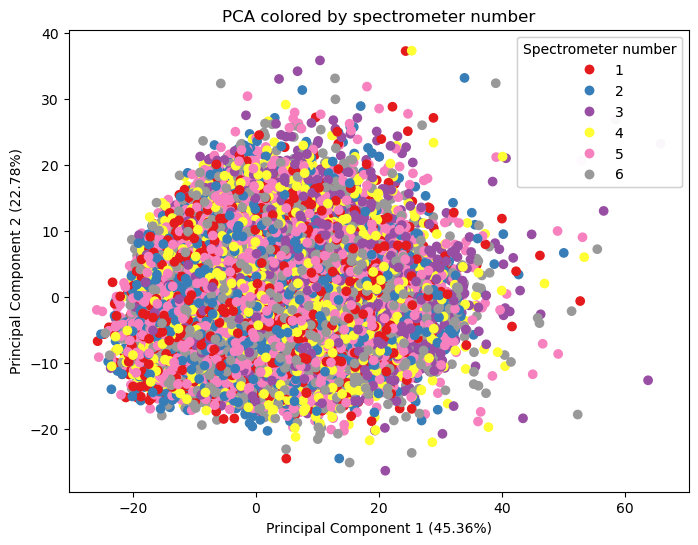

In [13]:
#let's plot pca
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:,0], pca_result[:,1], c=spec_num_filtered, cmap='Set1')
plt.xlabel('Principal Component 1' + ' (' + str(round(pca.explained_variance_ratio_[0]*100, 2)) + '%)')
plt.ylabel('Principal Component 2' + ' (' + str(round(pca.explained_variance_ratio_[1]*100, 2)) + '%)')
plt.title('PCA colored by spectrometer number')
legend1 = plt.legend(*scatter.legend_elements(), title="Spectrometer number")
plt.gca().add_artist(legend1)

In [14]:
#now let's calculate umap and repeat it
import umap

# Create UMAP instance: You can adjust the parameters if needed
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)

# Fit and transform the data
umap_result = umap_model.fit_transform(data_final)

# umap_result now holds the UMAP-transformed data

/home/sarthak/mambaforge/envs/krumsiek_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


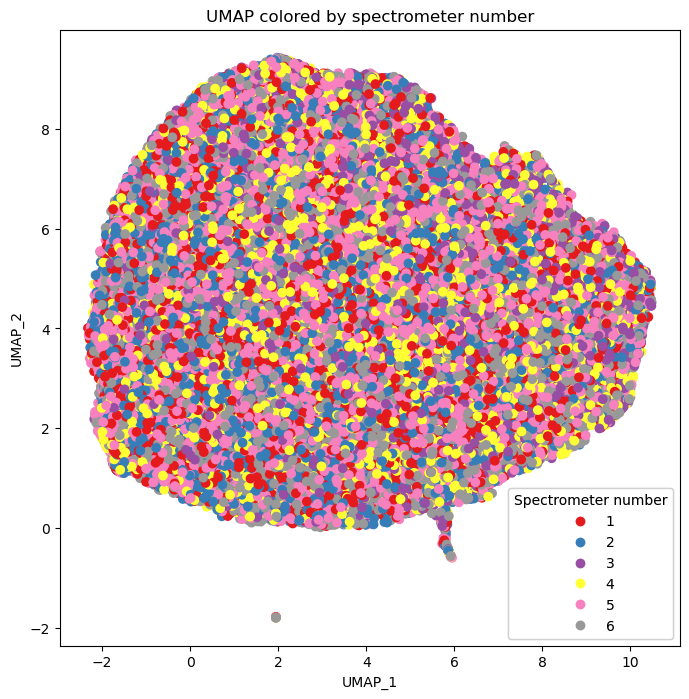

In [15]:
#let's plot umap
plt.figure(figsize=(8, 8))
scatter = plt.scatter(umap_result[:,0], umap_result[:,1], c=spec_num_filtered, cmap='Set1')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.title('UMAP colored by spectrometer number')
legend1 = plt.legend(*scatter.legend_elements(), title="Spectrometer number")
plt.gca().add_artist(legend1)

In [16]:
#now let's do a correlation plot showing how different subcategories are related and work as expected
import seaborn as sns

df = pd.DataFrame(data=data_final)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,-1.061607,-1.040458,-1.081482,-0.894332,-0.909176,-0.966528,-0.380597,-0.691193,-0.589857,-1.050473,...,-0.309549,-0.629472,-0.836884,-0.533962,-0.673462,-0.708850,-0.472333,-0.288647,-0.940507,-0.651432
1,-1.160568,-0.775451,-0.775133,-0.343300,-0.691371,-0.749966,-1.354344,-0.332339,-0.182502,-0.832560,...,-1.434379,-1.616555,-1.048760,-1.178135,-1.423427,-1.529400,-1.203194,-1.004508,-1.607932,-0.509844
2,0.707376,0.864237,0.845722,0.934272,0.872001,0.853242,-0.189776,1.314658,1.496825,0.353826,...,0.141002,0.128439,0.522015,1.533116,1.404972,1.261213,1.463332,1.531742,1.049160,0.859242
3,0.693759,0.365639,0.345979,-0.374312,0.642065,0.372326,1.063303,-1.117346,-1.078716,-1.186916,...,1.256136,0.989600,-0.659883,0.897368,0.744415,0.779696,1.052494,1.207351,0.445734,-1.089004
4,-0.393749,-0.561287,-0.580294,-0.873278,-0.364387,-0.524399,0.313072,-0.790381,-0.706482,-1.029672,...,0.552047,0.285204,-0.757062,0.294149,0.210937,0.234487,0.423298,0.576470,-0.087072,-0.812060


In [17]:
#now let's use the first PC and the labels to do an anova
from scipy import stats
#scatter = plt.scatter(pca_result[:,0], pca_result[:,1], c=spec_num_filtered, cmap='Set1')

#let's do a one way anova for each of the spectrometers
df = pd.DataFrame({
                   'PC1': pca_result[:,0],
                   'Group': spec_num_filtered
                   })

f,p = stats.f_oneway(df['PC1'][df['Group'] == 1], 
                                 df['PC1'][df['Group'] == 2], 
                                 df['PC1'][df['Group'] == 3],
                                 df['PC1'][df['Group'] == 4],
                                 df['PC1'][df['Group'] == 5],
                                 df['PC1'][df['Group'] == 6],)

print("F-value:", f)
print("P-value:", p)

F-value: 338.74882812076106
P-value: 0.0


In [18]:
#multiple comparisons test now
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result = pairwise_tukeyhsd(endog=df['PC1'], groups=df['Group'], alpha=0.05)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.2345 0.1612 -0.5145  0.0456  False
     1      3   4.2426    0.0  3.8965  4.5886   True
     1      4   1.1542    0.0  0.8652  1.4433   True
     1      5   0.2725 0.0264  0.0192  0.5257   True
     1      6   1.2163    0.0  0.9404  1.4921   True
     2      3    4.477    0.0  4.1302  4.8238   True
     2      4   1.3887    0.0  1.0988  1.6786   True
     2      5   0.5069    0.0  0.2527  0.7611   True
     2      6   1.4507    0.0   1.174  1.7274   True
     3      4  -3.0883    0.0 -3.4424 -2.7343   True
     3      5  -3.9701    0.0 -4.2956 -3.6446   True
     3      6  -3.0263    0.0 -3.3696 -2.6829   True
     4      5  -0.8818    0.0 -1.1458 -0.6177   True
     4      6    0.062 0.9897 -0.2237  0.3478  False
     5      6   0.9438    0.0  0.6943  1.1933   True
----------------------------------------------

Text(0.5, 1.0, 'PC1 vs Spectrometer number multiple comparisons')

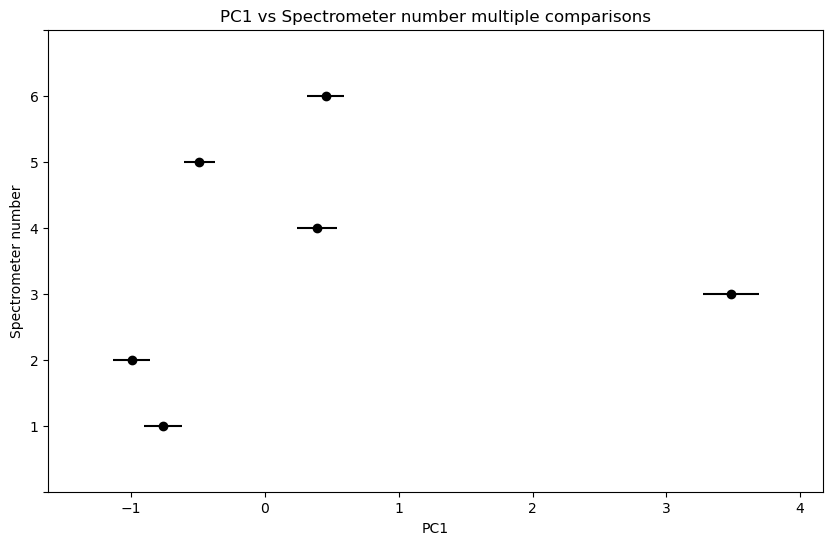

In [19]:
tukey_result.plot_simultaneous().show()
plt.ylabel('Spectrometer number')
plt.xlabel('PC1')
plt.title('PC1 vs Spectrometer number multiple comparisons')
#tukey HSD test shows that some spectrometers are significantly different from each other

In [20]:
#now we'll do MANOVA

df = pd.DataFrame(data=data_final)

df['Group'] = spec_num_filtered

df.head()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,Group
0,-1.061607,-1.040458,-1.081482,-0.894332,-0.909176,-0.966528,-0.380597,-0.691193,-0.589857,-1.050473,...,-0.629472,-0.836884,-0.533962,-0.673462,-0.708850,-0.472333,-0.288647,-0.940507,-0.651432,5
1,-1.160568,-0.775451,-0.775133,-0.343300,-0.691371,-0.749966,-1.354344,-0.332339,-0.182502,-0.832560,...,-1.616555,-1.048760,-1.178135,-1.423427,-1.529400,-1.203194,-1.004508,-1.607932,-0.509844,1
2,0.707376,0.864237,0.845722,0.934272,0.872001,0.853242,-0.189776,1.314658,1.496825,0.353826,...,0.128439,0.522015,1.533116,1.404972,1.261213,1.463332,1.531742,1.049160,0.859242,2
3,0.693759,0.365639,0.345979,-0.374312,0.642065,0.372326,1.063303,-1.117346,-1.078716,-1.186916,...,0.989600,-0.659883,0.897368,0.744415,0.779696,1.052494,1.207351,0.445734,-1.089004,4
4,-0.393749,-0.561287,-0.580294,-0.873278,-0.364387,-0.524399,0.313072,-0.790381,-0.706482,-1.029672,...,0.285204,-0.757062,0.294149,0.210937,0.234487,0.423298,0.576470,-0.087072,-0.812060,3


In [21]:
from statsmodels.multivariate.manova import MANOVA

df = pd.DataFrame(data=data_final)

new_columns = ['feature_' + str(i) for i in range(168)]
df.columns = new_columns
df['Group'] = spec_num_filtered
df['Group'] = df['Group'].astype(str)
columns_as_str = [str(i) for i in range(169)]
formula = 'Group ~ ' + ' + '.join(new_columns)

manova = MANOVA.from_formula(formula, data=df)
result = manova.mv_test()
print(result)

                                  Multivariate linear model
                                                                                              
----------------------------------------------------------------------------------------------
       Intercept               Value         Num DF   Den DF           F Value          Pr > F
----------------------------------------------------------------------------------------------
          Wilks' lambda               0.0000 6.0000 92540.0000 3969172471589181440.0000 0.0000
         Pillai's trace               1.0000 6.0000 92540.0000 3969172471589181952.0000 0.0000
 Hotelling-Lawley trace 257348550135455.9062 6.0000 92540.0000 3969172471589181952.0000 0.0000
    Roy's greatest root 257348550135455.9062 6.0000 92540.0000 3969172471589181952.0000 0.0000
----------------------------------------------------------------------------------------------
                                                                                     

In [22]:
#now let's go ahead and calculate the eta squared values to see the effect size

SS_effect = result.test_statistic_table.iloc[0,1]
SS_error = result.sse

eta_p_sq = SS_effect / (SS_effect + SS_error)
print(eta_p_sq)

AttributeError: 'MultivariateTestResults' object has no attribute 'test_statistic_table'

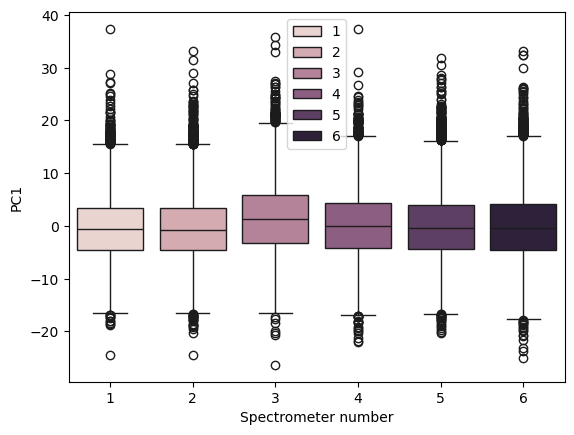

In [34]:
df = pd.DataFrame(data=pca_result[:,1], columns=['PC1'])

df['Group'] = spec_num_filtered
import seaborn as sns
import matplotlib.pyplot as plt
#fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df, x="Group", y="PC1", hue=spec_num_filtered)
plt.xlabel('Spectrometer number')
#sns.boxplot(data=df, x="plant_var", y="canopy_vol", hue = spec_num_filtered, ax=axs[1])
plt.show()

In [ ]:
# Assuming your DataFrame is named df
# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap (you can use other color maps as well)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

plt.xlabel('Metabolite')
plt.ylabel('Metabolite')
plt.title('Correlation plot of metabolites, grouped by type')

plt.show()

In [ ]:
# #now let's group them by types, first import types from the csv file
# import seaborn as sns
# import pandas as pd

# types = pd.read_csv('UKBB_100K_metabolomics_features.csv')
# met_types = types['Group']

# f, ax = plt.subplots(figsize=(10, 8))

# # Generate a custom diverging colormap (you can use other color maps as well)
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap
# sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": 0.5,'location':'left'})

# plt.xlabel('Metabolite')
# plt.ylabel('Metabolite')
# plt.title('Correlation plot of metabolites, grouped by type')

# #turn to list
# y_pos = 0
# mettypelist = met_types.tolist()
# for label in set(mettypelist):
#     count = mettypelist.count(label)
#     plt.text(data.shape[1]+0.5, y_pos + count/2, label, va='center', ha='left', fontsize=8, fontweight='bold')
#     y_pos += count

Cholesterol
Other lipids
Apolipoproteins
Phospholipids
Free cholesterol
Fatty acids
Cholesteryl esters
Amino acids
Lipoprotein particle concentrations
Triglycerides
Total lipids
Ketone bodies
Glycolysis related metabolites
Lipoprotein particle sizes
Lipoprotein subclasses
Inflammation
Fluid balance


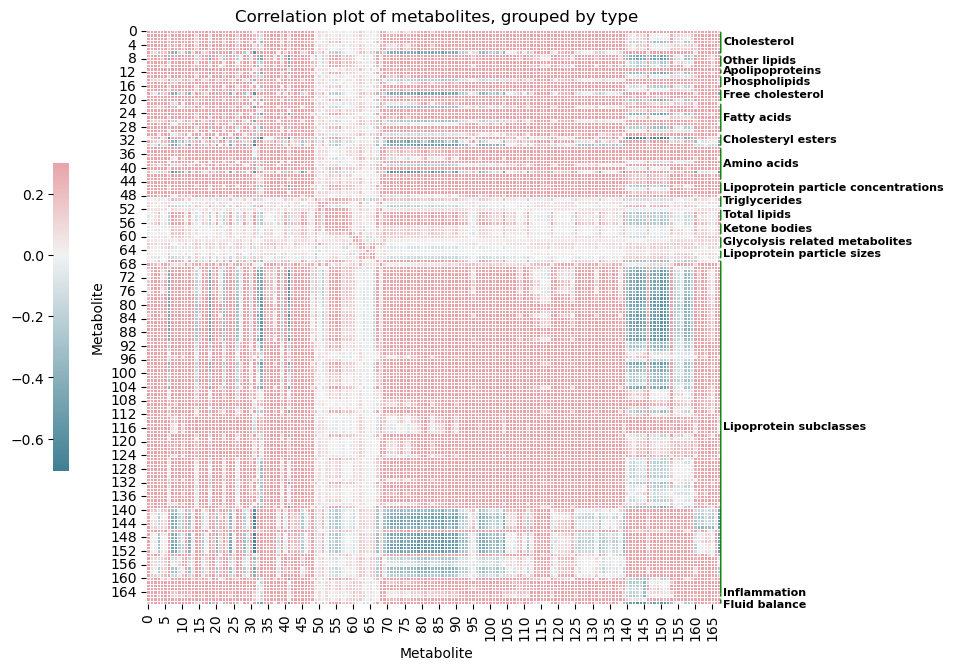

In [ ]:
#now let's group them by types, first import types from the csv file
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

types = pd.read_csv('UKBB_100K_metabolomics_features.csv')
met_types = types['Group']

f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap (you can use other color maps as well)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5,'location':'left'})

plt.xlabel('Metabolite')
plt.ylabel('Metabolite')
plt.title('Correlation plot of metabolites, grouped by type')
plt.xlim(0,168+2)

#turn to list
y_pos = 0
mettypelist = met_types.tolist()
for label in set(mettypelist):
    count = mettypelist.count(label)
    print(label)
    if not label == 'Inflammation' and not label == 'Fluid balance':
        plt.text(data.shape[1]+0.7, y_pos + count/2, label, va='center', ha='left', fontsize=8, fontweight='bold')
    elif label == 'Inflammation':
        plt.text(data.shape[1]+0.7, y_pos + count/2-1, label, va='center', ha='left', fontsize=8, fontweight='bold')
    else:
        plt.text(data.shape[1]+0.7, y_pos + count/2+1, label, va='center', ha='left', fontsize=8, fontweight='bold')
    ax.axhline(y=y_pos, xmin=168, xmax=169, color='black')
    ax.axhline(y=y_pos+count, xmin=168, xmax=169, color='black')
    ax.annotate("", xy=(168, y_pos), xytext=(168, y_pos+count+0.5),
                arrowprops=dict(arrowstyle='-', color='green'))
    y_pos += count
    
# groups = {
#     'cholesterol': (0.05, 0.15),
#     'phospholipids': (.20, .35)
# }

# for group, (start, end) in groups.items():
#     ax.axhline(y=start, xmin=1.02, xmax=1.04, color='black')
#     ax.axhline(y=end, xmin=1.02, xmax=1.04, color='black')
#     ax.annotate("", xy=(1.035, start), xycoords='axes fraction', xytext=(1.035, end),
#                 arrowprops=dict(arrowstyle='-', color='black'))
#     ax.text(1.05, (start + end) / 2, group, verticalalignment='center', transform=ax.transAxes)

plt.show()

In [ ]:
print(set(mettypelist))

{'Cholesterol', 'Other lipids', 'Apolipoproteins', 'Phospholipids', 'Free cholesterol', 'Fatty acids', 'Cholesteryl esters', 'Amino acids', 'Lipoprotein particle concentrations', 'Triglycerides', 'Total lipids', 'Ketone bodies', 'Glycolysis related metabolites', 'Lipoprotein particle sizes', 'Lipoprotein subclasses', 'Inflammation', 'Fluid balance'}
